# Stream254 

### GROUP 5

#### Authors
1. Caroline Ngabu
2. Muhsin Ahmed
3. Richard Muriithi
4. David Kirianja
5. Beatrice Kariuki

## BUSINESS UNDERSTANDING

### INTRODUCTION

The streaming landscape in Kenya has experienced remarkable growth recently, fueled by factors such as; improved internet connectivity and a rising preference for personalized entertainment experiences. As consumers increasingly turn to on-demand platforms, companies like Stream254 are faced with the challenge of enhancing user engagement to maintain competitiveness.

In response, Stream254 is embarking on a mission to revolutionize user engagement through cutting-edge technology. By implementing an advanced recommendation system, Stream254 aims to provide bespoke movie recommendations, thus addressing the growing demand for personalized content in the Kenyan streaming market.

### BUSINESS PROBLEM STATEMENT

Stream254 recognizes that traditional one-size-fits-all approaches to content delivery are no longer sufficient to meet the evolving demands of Kenyan viewers. Without personalized recommendations, users may face decision fatigue and frustration when navigating the platform's extensive content library. In a highly competitive market, failure to engage users effectively could lead to decreased retention rates and loss of market share.

To address this challenge, Stream254 seeks to implement a recommendation system that leverages machine learning algorithms to analyze user data and deliver highly relevant movie recommendations. By doing so, Stream254 aims to enhance user satisfaction, drive long-term engagement, and establish itself as a leader in the Kenyan streaming space.

### OBJECTIVES

Develop and implement state-of-the-art recommendation algorithm that will analyze user behaviour, preferences, and viewing patterns to generate personalized movie recommendations with the intention to:

1. Enhance User Satisfaction: By providing users with tailored movie recommendations, we aim to enhance user satisfaction and deliver an immersive viewing experience that keeps users coming back for more.

2. Increase User Retention: Through personalized recommendations, we seek to increase user retention rates and encourage users to spend more time on the platform, ultimately driving revenue growth and profitability.

3. Establish Competitive Differentiation: By offering a recommendation system that surpasses those of competitors, we aim to differentiate Stream254 as the go-to destination for personalized entertainment experiences in the Kenyan market.

4. Implement Performance Metrics: We will implement robust metrics and analytics to measure the performance of the recommendation system. This will enable us to continuously optimize algorithms and enhance user engagement over time.

## DATA UNDERSTANDING

This dataset describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100,836 ratings and 3,683 tag applications across 9,742 movies. These data were created by 610 users between March 29th 1996 and September 24th 2018. This dataset was generated on September 26th 2018.

This is a development dataset which means that it is a portion of data utilized for development and fine-tuning of machine learning models. These types of datasets are used in fine-tuning and optimizing models by tweaking hyper-parameters, adjusting architecture, and diagnosing potential overfitting. They are primarily employed for evaluating model performance and guiding improvements, rather than training.

Users in this dataset were selected at random for inclusion and all the selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.
The data are contained in the files links.csv, movies.csv, ratings.csv and tags.csv and are contained in the ’Data’ file of this GitHub repository


## REFERENCES

F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. https://doi.org/10.1145/2827872

## Import important Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd                 # For working with dataframes
import numpy as np                  # For numerical operations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD

## Load Dataset

In [3]:
movies_df = pd.read_csv('Data/movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# Display the shape of the dataset (number of rows and columns)
print("Dataset Shape:")
print("=================")
print("Number of Rows:", movies_df.shape[0])
print("Number of Columns:", movies_df.shape[1])

Dataset Shape:
Number of Rows: 9742
Number of Columns: 3


In [5]:
# Display the data types of columns
print("Data Types of Columns:")
print("============================")
print(movies_df.dtypes)

Data Types of Columns:
movieId     int64
title      object
genres     object
dtype: object


### Load `ratings.csv`


In [6]:
ratings_df = pd.read_csv('Data/ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
# Display the shape of the dataset (number of rows and columns)
print("Dataset Shape:")
print("=================")
print("Number of Rows:", ratings_df.shape[0])
print("Number of Columns:", ratings_df.shape[1])

Dataset Shape:
Number of Rows: 100836
Number of Columns: 4


In [8]:
# Display the data types of columns
print("Data Types of Columns:")
print("============================")
print(ratings_df.dtypes)

Data Types of Columns:
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


In [9]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


**Key Insights from ratings_df:**

1. **Rating Range:** Users have provided ratings in a range from 0.5 to 5.0, indicating diverse opinions about the movies.

2. **Average Rating:** The average rating across all movies is 3.5, suggesting that users, on average, tend to give moderate ratings.

3. **User IDs:** The dataset includes user IDs ranging from 1 to 610, representing a total of 610 unique users.

4. **Movie IDs:** Movie IDs span from 1 to 193609, with 193609 being the highest movie ID. Note that this represents the highest movie ID and not necessarily the total count of movies in the dataset.

These insights provide a foundational understanding of the dataset's characteristics and the user-movie interactions.

Lets drop timestamp since we won't need it🗑🗑🗄🗄

### Loading `tags.csv`

In [10]:
tags_df = pd.read_csv('Data/tags.csv')
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [11]:
# Display the shape of the dataset (number of rows and columns)
print("Dataset Shape:")
print("=================")
print("Number of Rows:", tags_df.shape[0])
print("Number of Columns:", tags_df.shape[1])

Dataset Shape:
Number of Rows: 3683
Number of Columns: 4


In [12]:
# Display the data types of columns
print("Data Types of Columns:")
print("============================")
print(tags_df.dtypes)

Data Types of Columns:
userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object


In [13]:
tags_df.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


In [14]:
ratings_df.drop(['timestamp'], axis=1, inplace=True)

### Loading `links.csv`

In [15]:
links_df = pd.read_csv('Data/links.csv')
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [16]:
# Display the shape of the dataset (number of rows and columns)
print("Dataset Shape:")
print("=================")
print("Number of Rows:", links_df.shape[0])
print("Number of Columns:", links_df.shape[1])

Dataset Shape:
Number of Rows: 9742
Number of Columns: 3


In [17]:
# Display the data types of columns
print("Data Types of Columns:")
print("============================")
print(links_df.dtypes)

Data Types of Columns:
movieId      int64
imdbId       int64
tmdbId     float64
dtype: object


In [18]:
links_df.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


## Merge `movies_df` & `ratings_df`

Most import dataset for the analysis

In [19]:
# Merge the datasets on the 'movieId' column
merged_df = pd.merge(ratings_df, movies_df, on='movieId')

In [20]:
# Display the first five rows of the merged dataset
print("Merged_df head:")
print("============================")
merged_df.head()

Merged_df head:


,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [21]:
print("Merged Dataset Shape:")
print("==========================")
print("Number of Rows:", merged_df.shape[0])
print("Number of Columns:", merged_df.shape[1])

Merged Dataset Shape:
Number of Rows: 100836
Number of Columns: 5


## Visualization on the dataset

In [22]:
# Split the genres within each entry and create a list of genres
def find_genres(movies_df):
    genres = {}  # dictionary to store different genre values

    for genre in movies_df['genres']:
        words = genre.split('|')
        for word in words:
            genres[word] = genres.get(word, 0) + 1

    return genres

In [23]:
genre_counts = find_genres(movies_df)
genre_counts

{'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Fantasy': 779,
 'Romance': 1596,
 'Drama': 4361,
 'Action': 1828,
 'Crime': 1199,
 'Thriller': 1894,
 'Horror': 978,
 'Mystery': 573,
 'Sci-Fi': 980,
 'War': 382,
 'Musical': 334,
 'Documentary': 440,
 'IMAX': 158,
 'Western': 167,
 'Film-Noir': 87,
 '(no genres listed)': 34}

In [24]:
# First, split the genres within each entry and create a list of genres
genres_list = movies_df['genres'].str.split('|').tolist()

# Now, flatten the list of lists into a single list of genres
all_genres = [genre for sublist in genres_list for genre in sublist]

# Count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Print the counts of each genre
print(genre_counts)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: count, dtype: int64


In [25]:
# First, split the genres within each entry and create a list of genres
genres_list = movies_df['genres'].str.split('|').tolist()

# Now, flatten the list of lists into a single list of genres
all_genres = [genre for sublist in genres_list for genre in sublist]

# Count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Convert the series to a dictionary
genre_counts_dict = genre_counts.to_dict()

# Print the genre counts as a dictionary
print(genre_counts_dict)

{'Drama': 4361, 'Comedy': 3756, 'Thriller': 1894, 'Action': 1828, 'Romance': 1596, 'Adventure': 1263, 'Crime': 1199, 'Sci-Fi': 980, 'Horror': 978, 'Fantasy': 779, 'Children': 664, 'Animation': 611, 'Mystery': 573, 'Documentary': 440, 'War': 382, 'Musical': 334, 'Western': 167, 'IMAX': 158, 'Film-Noir': 87, '(no genres listed)': 34}


In [26]:
genre_counts['None'] = genre_counts.pop('(no genres listed)')

In [27]:
genre_counts

Drama          4361
Comedy         3756
Thriller       1894
Action         1828
Romance        1596
Adventure      1263
Crime          1199
Sci-Fi          980
Horror          978
Fantasy         779
Children        664
Animation       611
Mystery         573
Documentary     440
War             382
Musical         334
Western         167
IMAX            158
Film-Noir        87
None             34
Name: count, dtype: int64

## Check for  Missing Values

In [28]:
merged_df.isna().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64

In [29]:
merged_df.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


## Explotary Data Analysis

### Top Genres

### Top ten watched movies

In [30]:
top_ten_watched_movies = merged_df.groupby('title')['rating'].count().sort_values(ascending=False)
top_ten_watched_movies.head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

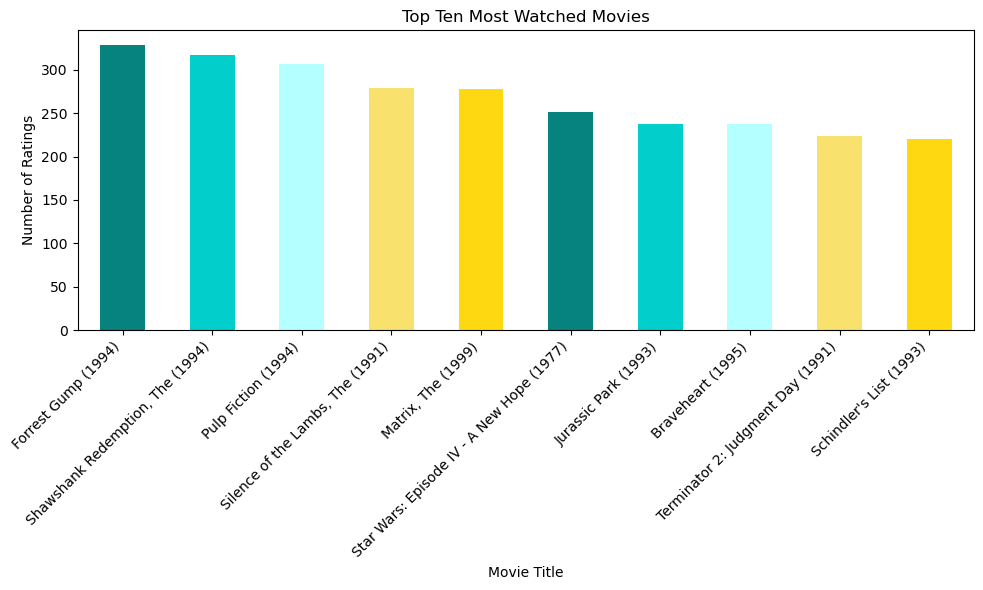

In [31]:
# Step 1: Group data by movie title and count the number of ratings
watch_counts = merged_df['title'].value_counts()

# Step 2: Get the top ten most watched movies
top_ten_watched = watch_counts.head(10)

# Step 3: Plot the histogram
plt.figure(figsize=(10, 6))
top_ten_watched.plot(kind='bar', color=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
plt.title('Top Ten Most Watched Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Top 10 Highly Rated Movies

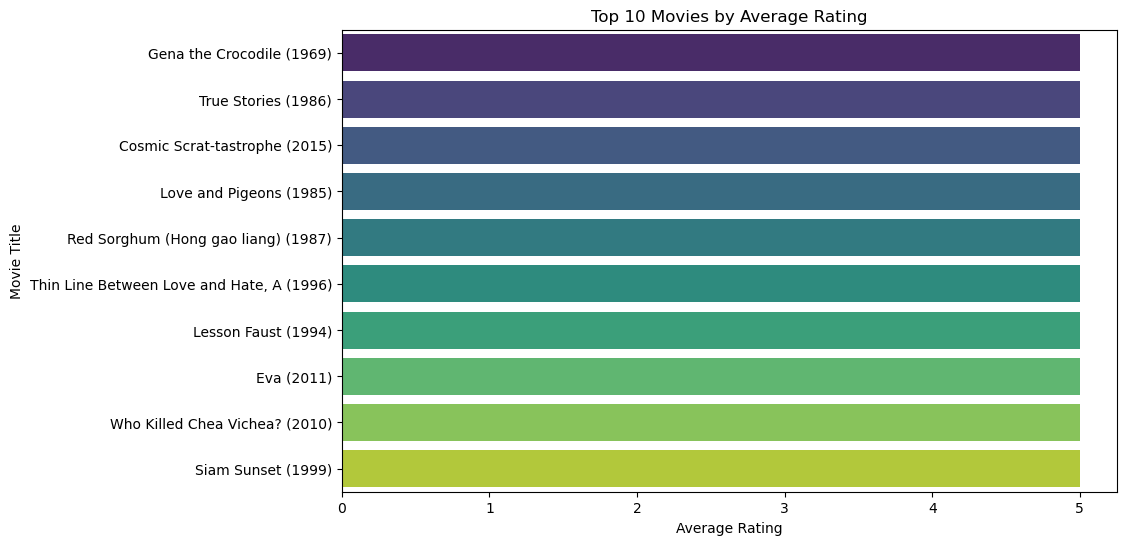

In [32]:
# the average rating for each movie
average_ratings = merged_df.groupby('title')['rating'].mean().reset_index()

# Rename the columns for clarity
average_ratings.columns = ['title', 'avg_rating']

# Sort the movies by average rating in descending order
average_ratings = average_ratings.sort_values(by='avg_rating', ascending=False)

# bar plot to visualize the top 10 movies by average rating
plt.figure(figsize=(10, 6))
sns.barplot(x="avg_rating", y="title", data=round(average_ratings.head(10), 2), palette="viridis")
plt.title("Top 10 Movies by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.show()

## Analysis of Movies with a Mean Rating of and User Rating

In [33]:
# Prompt the user to input a rating value
rating_value = float(input("Enter a rating value: "))

# Step 1: Group data by movie title and calculate mean rating
mean_ratings = merged_df.groupby('title')['rating'].mean()

# Step 2: Filter movies with a mean rating of the chosen value
top_rated_movies = mean_ratings[mean_ratings == rating_value].index.tolist()

# Step 3: Retrieve user ratings for these movies
top_rated_movie_ratings = merged_df[merged_df['title'].isin(top_rated_movies)]

# Calculate the total number of movies with the chosen rating value
num_top_rated_movies = len(top_rated_movies)

# Calculate the total number of users who have given the chosen rating to these movies
num_users_with_chosen_rating = top_rated_movie_ratings[top_rated_movie_ratings['rating'] == rating_value].groupby('title')['userId'].nunique().sum()

# Display the results
print(f"Total number of movies with a mean rating of {rating_value}: {num_top_rated_movies}")
print(f"Total number of users who have given a rating of {rating_value} to these movies: {num_users_with_chosen_rating}")

Enter a rating value:  4


Total number of movies with a mean rating of 4.0: 1008
Total number of users who have given a rating of 4.0 to these movies: 1352


# Collaborative Filtering

`Memory-Based CF:` The approach that relies on finding similarities between users or items to recommend similar items. It typically involves techniques such as Neighbourhood-based CF, where recommendations are made based on the preferences of similar users or items.

`Model-Based CF:` : This approach utilizes various data mining and machine learning algorithms to predict users' ratings or preferences for unrated items. One example of model-based CF is Principal Component Analysis (PCA), which helps identify the most significant components or features in the data and use them to make predictions.

## User-Item Matrix

In [34]:
# pivot table to transform the merged DataFrame into a user-item matrix
pivot_matrix = merged_df.pivot_table(
    index='userId',        # Rows will be indexed by 'userId'
    columns='title',       # Columns will be indexed by 'title'
    values='rating'        # The values in the matrix will be 'rating'
)

# print the first 10 rows of the `pivot_matrix`
pivot_matrix.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


## Collaborative Filtering using user preference

In [35]:
user_matrix = pivot_matrix.copy()
# For unrated movies, we assume the average rating of the user
user_matrix = user_matrix.apply(lambda row: row.fillna(row.mean()), axis=1)

# Print the first 5 rows of the updated user utility matrix
user_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,...,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.000000,4.366379
2,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,...,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276
3,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,...,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897
4,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,...,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556
5,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,...,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364


In [36]:
user_corr_matrix = user_matrix.T.corr()
user_corr_matrix
#plt.figure(figsize=(10, 10))
#sns.heatmap(user_corr_matrix, annot=True, cmap='coolwarm')
#plt.show()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.264516e-03,5.525772e-04,0.048419,0.021847,-0.045497,-6.199672e-03,0.047013,1.950985e-02,-8.754088e-03,...,0.018127,-0.017172,-0.015221,-3.705875e-02,-2.912138e-02,0.012016,0.055261,0.075224,-2.571255e-02,0.010932
2,0.001265,1.000000e+00,-4.975816e-17,-0.017164,0.021796,-0.021051,-1.111357e-02,-0.048085,7.652805e-16,3.011629e-03,...,-0.050551,-0.031581,-0.001688,-1.265569e-15,-6.430371e-16,0.006226,-0.020504,-0.006001,-6.009100e-02,0.024999
3,0.000553,-4.975816e-17,1.000000e+00,-0.011260,-0.031539,0.004800,-2.587070e-16,-0.032471,-4.812885e-16,3.774064e-16,...,-0.004904,-0.016117,0.017749,-8.106536e-16,-1.430628e-03,-0.037289,-0.007789,-0.013001,-1.168878e-16,0.019550
4,0.048419,-1.716402e-02,-1.125978e-02,1.000000,-0.029620,0.013956,5.809139e-02,0.002065,-5.873603e-03,5.159032e-02,...,-0.037687,0.063122,0.027640,-1.378212e-02,4.003747e-02,0.020590,0.014628,-0.037569,-1.788358e-02,-0.000995
5,0.021847,2.179571e-02,-3.153892e-02,-0.029620,1.000000,0.009111,1.011715e-02,-0.012284,7.750436e-16,-3.316512e-02,...,0.015964,0.012427,0.027076,1.246135e-02,-3.627206e-02,0.026319,0.031896,-0.001751,9.382892e-02,-0.000278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.012016,6.225827e-03,-3.728895e-02,0.020590,0.026319,-0.009137,2.832591e-02,0.022277,3.163273e-02,-3.994577e-02,...,0.053683,0.016384,0.098011,6.107833e-02,1.967830e-02,1.000000,0.017927,0.056676,3.842210e-02,0.075464
607,0.055261,-2.050374e-02,-7.789105e-03,0.014628,0.031896,0.045501,3.098070e-02,0.048822,-1.216061e-02,-1.765576e-02,...,0.049059,0.038197,0.049317,2.355180e-03,-2.938114e-02,0.017927,1.000000,0.044514,1.904919e-02,0.021860
608,0.075224,-6.000828e-03,-1.300064e-02,-0.037569,-0.001751,0.021727,2.841409e-02,0.071759,3.278284e-02,-5.199963e-02,...,0.069198,0.051388,0.012801,6.318649e-03,-7.977761e-03,0.056676,0.044514,1.000000,5.071449e-02,0.054454


In [37]:
# Calculate correlations for the target user (e.g., User 4)
target_user_id = 4
user_corr_target = user_corr_matrix[target_user_id]

# Sort the correlations in descending order
user_corr_target_sorted = user_corr_target.sort_values(ascending=False)
user_corr_target_sorted.head()

userId
4      1.000000
75     0.116409
137    0.091699
590    0.087103
391    0.081517
Name: 4, dtype: float64

### Select Top Similar Users:

Select the top  most similar users based on the sorted correlations. These are the users whose ratings will be used to make recommendations.

In [38]:
def select_top_similar_users(user_corr_target_sorted, target_user_id, k=5):
    # Get the correlation values for the target user
    user_correlations = user_corr_target_sorted

    # Sort the correlations in descending order
    sorted_correlations = user_correlations.sort_index(ascending=False)

    # Exclude the target user (if present) from the list of similar users
    similar_users = user_correlations.drop(target_user_id)

    # Select the top k most similar users
    top_similar_users = similar_users.head(k)

    # Return the indices or IDs of the top similar users
    return top_similar_users.index.tolist()

top_similar_users = select_top_similar_users(user_corr_matrix, target_user_id, k=5)
print("Top 5 Similar Users for User", target_user_id, ":")
print(top_similar_users)

Top 5 Similar Users for User 4 :
[1, 2, 3, 5, 6]


In [39]:
def predict_movie_ratings(user_matrix, user_corr_matrix, target_user_id, top_similar_users):
    predicted_ratings = {}
    for movie_id in user_matrix.columns:
        weighted_sum = 0
        sum_similarity = 0
        for similar_user_id in top_similar_users:
            if not pd.isnull(user_matrix.loc[similar_user_id, movie_id]):  # If the similar user has rated the movie
                similarity = user_corr_matrix.loc[target_user_id, similar_user_id]
                rating = user_matrix.loc[similar_user_id, movie_id]
                weighted_sum += similarity * rating
                sum_similarity += similarity
        if sum_similarity != 0:
            predicted_rating = weighted_sum / sum_similarity
        else:
            predicted_rating = 0
        predicted_ratings[movie_id] = predicted_rating
    return predicted_ratings


### Recommend Top Movies

In [40]:
def recommend_top_movies(predicted_ratings, n=5):
    top_movies = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)[:n]
    return top_movies

### In useage with User 4

Use the recommend_top_movies function to recommend movies for any user.

In [41]:
predicted_ratings = predict_movie_ratings(user_matrix, user_corr_matrix, target_user_id, top_similar_users)
top_movie_recommendations = recommend_top_movies(predicted_ratings, n=5)
print("Top 5 Movie Recommendations for User", target_user_id, ":")
for movie_id, predicted_rating in top_movie_recommendations:
    print(f"{movie_id}: {predicted_rating:.2f}")

Top 5 Movie Recommendations for User 4 :
Legends of the Fall (1994): 29.66
Shawshank Redemption, The (1994): 26.19
True Lies (1994): 26.04
Bambi (1942): 25.34
Rescuers, The (1977): 25.34


## Item-Based Recommendation:

Item-based recommendation, also known as item-item collaborative filtering, is a technique used in recommender systems to suggest items to users based on the similarity between items. 

In [42]:
if 'Pulp Fiction (1994)' in pivot_matrix.columns:
    pulp_fiction_ratings = pivot_matrix[['Pulp Fiction (1994)']].mean()
    num_users_rated = pivot_matrix['Pulp Fiction (1994)'].sum()
    print("Mean Ratings for 'Pulp Fiction (1994)':")
    print(pulp_fiction_ratings)
    print(f"Number of users who rated 'Pulp Fiction (1994)': {num_users_rated}")
else:
    print("The column 'Pulp Fiction (1994)' is not present in the DataFrame.")

Mean Ratings for 'Pulp Fiction (1994)':
title
Pulp Fiction (1994)    4.197068
dtype: float64
Number of users who rated 'Pulp Fiction (1994)': 1288.5


In [43]:
# Make a copy of the original utility matrix
item_utility_matrix = pivot_matrix.copy()

# Display the first 10 rows of the item utility matrix
item_utility_matrix.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [44]:
def fill_missing_with_column_means(dataframe):
    """
    Fill missing (NaN) values in a DataFrame column-wise with the corresponding column's mean.
        
    Returns:
        pd.DataFrame: The DataFrame with missing values filled using column means.
    """
    # Fill missing values in each column with the column mean
    filled_dataframe = dataframe.apply(lambda col: col.fillna(col.mean()), axis=0)
    
    return filled_dataframe

# call the function
item_matrix_filled = fill_missing_with_column_means(item_utility_matrix)
item_matrix_filled.head(5)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,4.000000,1.0
2,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
3,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
4,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
5,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0


In [45]:
item_matrix_corr = item_matrix_filled.corr()
item_matrix_corr.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,1.0,NaN,-2.470228e-17,NaN,-6.783236e-16,-4.090781e-16,...,NaN,1.491400e-15,-2.970631e-18,NaN,NaN,-1.174172e-16,-4.643126e-16,-1.457468e-15,2.901144e-15,NaN


In [46]:
## correlation values for 'Pulp Fiction (1994)' from the correlation matrix
pulp_fiction_corr = item_matrix_corr['Pulp Fiction (1994)']

# Sort the correlations in descending order
pulp_fiction_corr= pulp_fiction_corr.sort_values(ascending=False)

# Drop NAN values
pulp_fiction_corr = pulp_fiction_corr.dropna()

pulp_fiction_corr.head()

title
Pulp Fiction (1994)                            1.000000
Fight Club (1999)                              0.279334
Seven Samurai (Shichinin no samurai) (1954)    0.226609
Usual Suspects, The (1995)                     0.205534
Silence of the Lambs, The (1991)               0.197072
Name: Pulp Fiction (1994), dtype: float64

In [47]:
# We put the above data in a dataframe
similar_to_pulp = pd.DataFrame(data = pulp_fiction_corr.values, columns=['correlation'],
                              index = pulp_fiction_corr.index)

# remove Pulp 'Fiction 1994'
similar_to_pulp = similar_to_pulp[1:]
similar_to_pulp.head()

,correlation
title,
Fight Club (1999),0.279334
Seven Samurai (Shichinin no samurai) (1954),0.226609
"Usual Suspects, The (1995)",0.205534
"Silence of the Lambs, The (1991)",0.197072
East is East (1999),0.193432


### Prediction Using Item Based Collaborative Filtering

In [48]:
def get_top_5_recommendations(user_ratings, item_matrix_corr):
    # correlations between user's ratings and all other movies
    user_corr = item_matrix_corr[user_ratings.index].sum(axis=1)
    
    # DataFrame to store correlation values and total ratings
    user_similar_movies = pd.DataFrame(data=user_corr, columns=['Correlation'])
    
    # Filter out movies the user has already rated
    user_similar_movies = user_similar_movies.drop(user_ratings.index, errors='ignore')
    
    # Sort by correlation in descending order
    user_similar_movies = user_similar_movies.sort_values(by=['Correlation'], ascending=False)
    
    # Get the top 5 recommendations
    top_recommendations = user_similar_movies.head(5)
    
    return top_recommendations

# Example usage:
user_ratings = pd.Series({'Pulp Fiction (1994)': 5.0}, {'Poltergeist (1982)': 4.0})
top_5_recommendations = get_top_5_recommendations(user_ratings, item_matrix_corr)
print(top_5_recommendations)

                          Correlation
title                                
Terminator, The (1984)       0.341512
Patriot, The (2000)          0.310142
Dirty Harry (1971)           0.301141
Little Black Book (2004)     0.279448
Flatliners (1990)            0.272172


# Model-Based Collaborative Filtering

## Baseline Model KNN Basic

### Tuned KNN Basic (Grid Search)

### KNN Baseline and tuned

## Singular Value Decomposition (SVD)

In [49]:
## Create a new datafram svd_df
svd_df = pd.DataFrame({
    'userId': merged_df['userId'],        # Rows will be indexed by 'userId'
    'movieId': merged_df['movieId'],      # Columns will be indexed by 'movieId'
    'rating': merged_df['rating']
})
svd_df.head()

,userId,movieId,rating
0,1,1,4.0
1,5,1,4.0
2,7,1,4.5
3,15,1,2.5
4,17,1,4.5


In [50]:
#Transform the dataset into something more compatible with #surprise'
from surprise import Reader, Dataset

reader = Reader(rating_scale=(0.0, 5.0))
data = Dataset.load_from_df(svd_df, reader)
print(data)

In [51]:
dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of items: ', dataset.n_items)

Number of users:  610 

Number of items:  9724


In [52]:
# Initialize the SVD algorithm 
svd = SVD(random_state = 42)
# Perform cross-validation with 5 folds (you can adjust the 'cv' parameter)
results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Print the cross-validation results
for metric in ['test_rmse', 'test_mae']:
    print(f'{metric}: {results[metric].mean()}')

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8692  0.8781  0.8842  0.8701  0.8724  0.8748  0.0056  
MAE (testset)     0.6670  0.6710  0.6802  0.6695  0.6701  0.6715  0.0045  
Fit time          2.04    1.25    1.32    1.28    1.21    1.42    0.31    
Test time         0.34    0.12    0.11    0.20    0.10    0.17    0.09    
test_rmse: 0.874805727403011
test_mae: 0.6715298353629344


#### Cross Validation Results explaination
We explain ............

In [53]:
# Define the parameter grid for SVD
params = {'n_factors': [20, 50, 100],   # Number of factors
          'n_epochs': [10, 20, 30],     # Number of iterarations
         'reg_all': [0.02, 0.05, 0.1]}  # Regularization term
g_s_svd = GridSearchCV(SVD,param_grid=params,cv=5,n_jobs=-1)
g_s_svd.fit(data)

In [54]:
# print out optimal parameters for SVD after GridSearch
print(g_s_svd.best_score)
print(g_s_svd.best_params)

{'rmse': 0.8630944230512323, 'mae': 0.6622298225385641}
{'rmse': {'n_factors': 100, 'n_epochs': 30, 'reg_all': 0.05}, 'mae': {'n_factors': 100, 'n_epochs': 30, 'reg_all': 0.05}}


### Bayesian SVD

### Predicition with SVD

In [55]:
better_svd = SVD(n_factors= 100, n_epochs= 30 ,reg_all=0.05)
better_svd.fit(dataset)                       

In [56]:
better_svd.predict(2, 4)

Prediction(uid=2, iid=4, r_ui=None, est=2.8612660154789236, details={'was_impossible': False})

In [57]:
# User ID for which you want to make recommendations
user_Id = 4

# Get a list of all movie IDs in your dataset
all_movie_ids = np.unique(svd_df['movieId'])

# Create a list to store predicted ratings for unrated movies
ratings = []

# Predict ratings for the user on unrated movies
for movie_id in all_movie_ids:
    # Check if the user has already rated the movie
    if not svd_df[(svd_df['userId'] == user_Id) & (svd_df['movieId'] == movie_id)].empty:
        continue  # Skip if the user has rated the movie

    predicted_rating = better_svd.predict(user_Id, movie_id)
    ratings.append((movie_id, predicted_rating.est))

# Sort the predicted ratings in descending order
ratings.sort(key=lambda x: x[1], reverse=True)

# Top 5 movie recommendations
top_5_recommendations = ratings[:5]

# Display the top 5 recommended movies
for movie_id, predicted_rating in top_5_recommendations:
    movie_title = movies_df[movies_df['movieId'] == movie_id]['title'].values[0]
    print(f"Movie: {movie_title}, Predicted Rating: {predicted_rating:.2f}")


Movie: Schindler's List (1993), Predicted Rating: 4.63
Movie: Cool Hand Luke (1967), Predicted Rating: 4.55
Movie: Grand Day Out with Wallace and Gromit, A (1989), Predicted Rating: 4.53
Movie: Miracle on 34th Street (1947), Predicted Rating: 4.52
Movie: Hunt for Red October, The (1990), Predicted Rating: 4.50


The top 5 movie recommendations for User 4 are as follows:

1. **All About Eve (1950)**, with a predicted rating of 4..62
2. **Secrets & Lies (1996)**, with a predicted rating of 4..52
3. **Mr. Smith Goes to Washington (1939)**, with a predicted rating of .4.50
4. **Dark Knight Rises, The (2012)**, with a predicted rating of. 4.37
5. **Paths of Glory (1957)**, with a predicted rating o.f 4.35
f 4.358 4.28.

# Non-Negative Matrix Factorization (NMF)

In [58]:
## Create a new datafram svd_df
nmf_df = pd.DataFrame({
    'userId': merged_df['userId'],        # Rows will be indexed by 'userId'
    'movieId': merged_df['movieId'],      # Columns will be indexed by 'movieId'
    'rating': merged_df['rating']
})
nmf_df.head()

,userId,movieId,rating
0,1,1,4.0
1,5,1,4.0
2,7,1,4.5
3,15,1,2.5
4,17,1,4.5


In [59]:
#Transform the dataset into something more compatible with #surprise'
from surprise import Reader, Dataset

reader = Reader(rating_scale=(0.0, 5.0))
data_nmf = Dataset.load_from_df(nmf_df, reader)
print(data_nmf)

In [60]:
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.matrix_factorization import NMF
from sklearn.model_selection import train_test_split

In [61]:
nmf = NMF(n_factors=50, n_epochs=100, biased=False)
cross_validate(algo=nmf, data=data_nmf, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9129  0.9038  0.9065  0.8971  0.9057  0.9052  0.0051  
Fit time          8.49    8.27    8.34    10.04   8.46    8.72    0.66    
Test time         0.27    0.09    0.12    0.23    0.10    0.16    0.07    


{'test_rmse': array([0.91289732, 0.90378895, 0.9065369 , 0.89711698, 0.90565366]),
 'fit_time': (8.49435830116272,
  8.272342443466187,
  8.342243909835815,
  10.039528608322144,
  8.461908340454102),
 'test_time': (0.27301645278930664,
  0.09379243850708008,
  0.12123894691467285,
  0.23307323455810547,
  0.10336565971374512)}

Explaining, kidogo tu ......

In [62]:
nmfset = data_nmf.build_full_trainset()  # Build the full training set
nmf.fit(nmfset)

### Prediction with Non-Negative Matrix Factorization

In [63]:
# Make predictions for a specific user
user_id = 4
user_movies = nmf_df[nmf_df['userId'] == user_id]['movieId'].unique()
unrated_movies = [movie_id for movie_id in nmf_df['movieId'].unique() if movie_id not in user_movies]

# Make predictions for unrated movies
predictions = {movie_id: nmf.predict(user_id, movie_id).est for movie_id in unrated_movies}

# Sort predictions by estimated rating (descending order)
sorted_predictions = sorted(predictions.items(), key=lambda x: x[1], reverse=True)

# Get the top 5 movie recommendations with predicted ratings
top_5_recommendations = sorted_predictions[:5]

# Print the top 5 movie recommendations for the user with predicted ratings
print(f"The top 5 movie recommendations for User {user_id} with predicted ratings are as follows:")
for i, (movie_id, predicted_rating) in enumerate(top_5_recommendations, 1):
    movie_title = movies_df.loc[movies_df['movieId'] == movie_id, 'title'].values[0]
    print(f"{i}. {movie_title} (ID: {movie_id}), Predicted Rating: {predicted_rating:.2f}")


The top 5 movie recommendations for User 4 with predicted ratings are as follows:
1. Paths of Glory (1957) (ID: 1178), Predicted Rating: 5.00
2. Stalker (1979) (ID: 1232), Predicted Rating: 4.96
3. Double Indemnity (1944) (ID: 3435), Predicted Rating: 4.89
4. On the Beach (1959) (ID: 3379), Predicted Rating: 4.78
5. Wallace & Gromit: The Best of Aardman Animation (1996) (ID: 720), Predicted Rating: 4.76


# Deployment

In the simple Flask deployment, I created an app.py Python script that serves as the main application file. This script initializes a Flask web application, loads a recommendation model, and provides movie recommendations to users based on their input.

We also created two HTML files, index.html and "recommendations.html which are used for the user interface. "index.html" contains a form for entering a user ID, and "recommendations.html" displays the top movie recommendations with their titles and predicted ratings. These files are rendered using Flask's "render_template" function to create a user-friendly interface for the recommendation system.